<a href="https://colab.research.google.com/github/Christineding211/Christine_projects/blob/main/Sales_predict_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
sales_train_df  = pd.read_csv("/content/drive/MyDrive/PythonBusiness/Project_1/train.csv")
sales_train_df.head()

<ipython-input-7-3cd2877eee54>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df  = pd.read_csv("/content/drive/MyDrive/PythonBusiness/Project_1/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.info()
#1017209 rows and 9 columns(variables), the sales is the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Average sales amount per day = 5773 Euros, maximum sales per day = 41551 Average number of customers = 633, maximum number of customers = 7388

In [ ]:
store_info_df = pd.read_csv("/content/drive/MyDrive/PythonBusiness/Project_1/store.csv")
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_info_df.info()
#1115 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe()
# on average, the competition distance is 5404 meters away

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
#checking the missing data in sales_train_df
missing_data = sales_train_df.isnull().sum()
print(missing_data)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

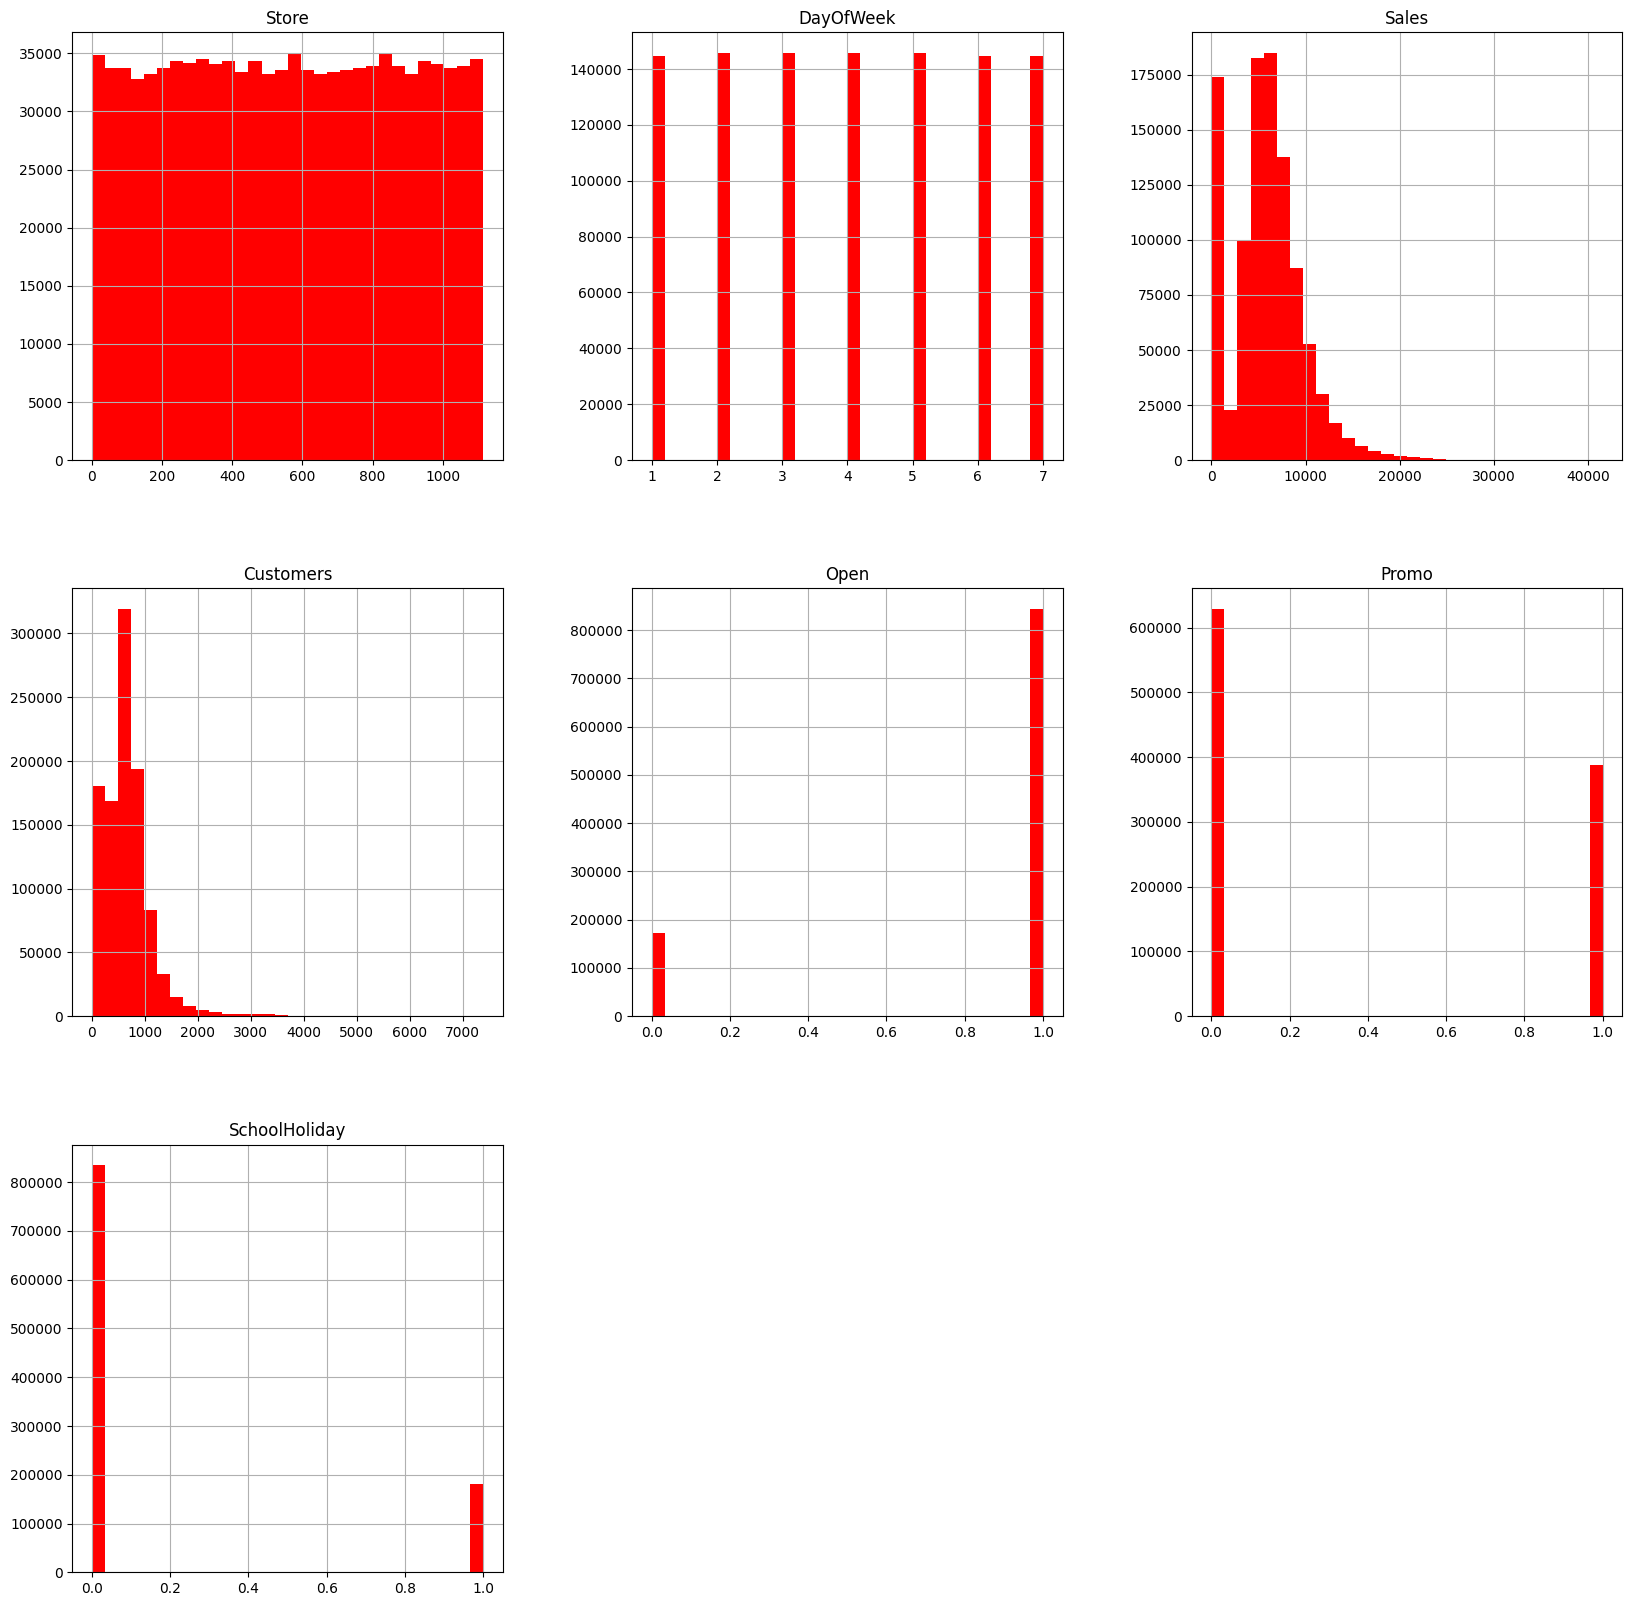

In [ ]:
sales_train_df.hist(bins=30, figsize=(20, 20), color='r')

In [ ]:
# how many stores are open and closed
store_closed = sales_train_df[sales_train_df['Open']==0]
print(len(store_closed))
open_store = sales_train_df[sales_train_df['Open']==1]
print(len(open_store))

172817
844392


In [ ]:
print("Total number of stores:", len(sales_train_df))
print("Number of open stores:", len(open_store))
print("Number of closed stores:", len(store_closed))

Total number of stores: 1017209
Number of open stores: 844392
Number of closed stores: 172817


In [ ]:
#Only keep the open stores in the dataframe
sales_train_df =sales_train_df[sales_train_df['Open']== 1]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
# since the dataframe only have the open stores now, we can drop the column
sales_train_df.drop(['Open'], axis =1, inplace = True)
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [ ]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


the average of sales  = 6995 Euros(original 5773 Euros)
the average number of customers = 762 (original 633)

<Axes: >

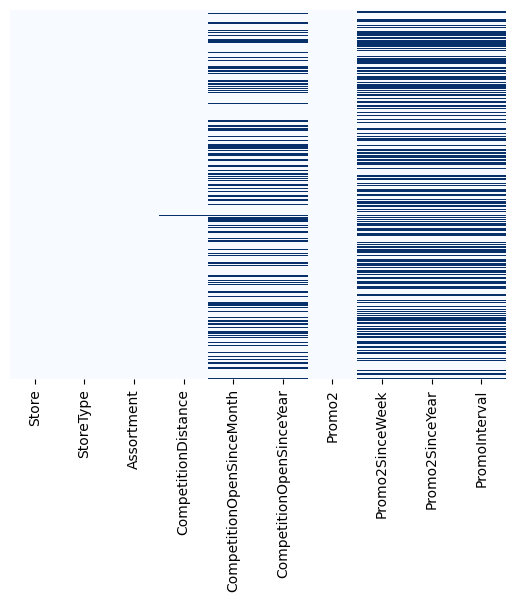

In [ ]:
sns.heatmap(store_info_df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
# check the missing data in store dataframe
store_missing = store_info_df.isnull().sum()
print(store_missing)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [ ]:
# look the missinf data in CompetitionDistance
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
#missing in CompetitionOpenSinceMonth
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()] #354 rows missing

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_info_df[store_info_df['Promo2']==0]
#'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# fill with 0 in missing data
mis_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for cols in mis_cols:
    store_info_df[cols].fillna(0, inplace = True)

In [ ]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
#store_info_df['CompetitionDistance'].mean()  = 5404.90
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

In [ ]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

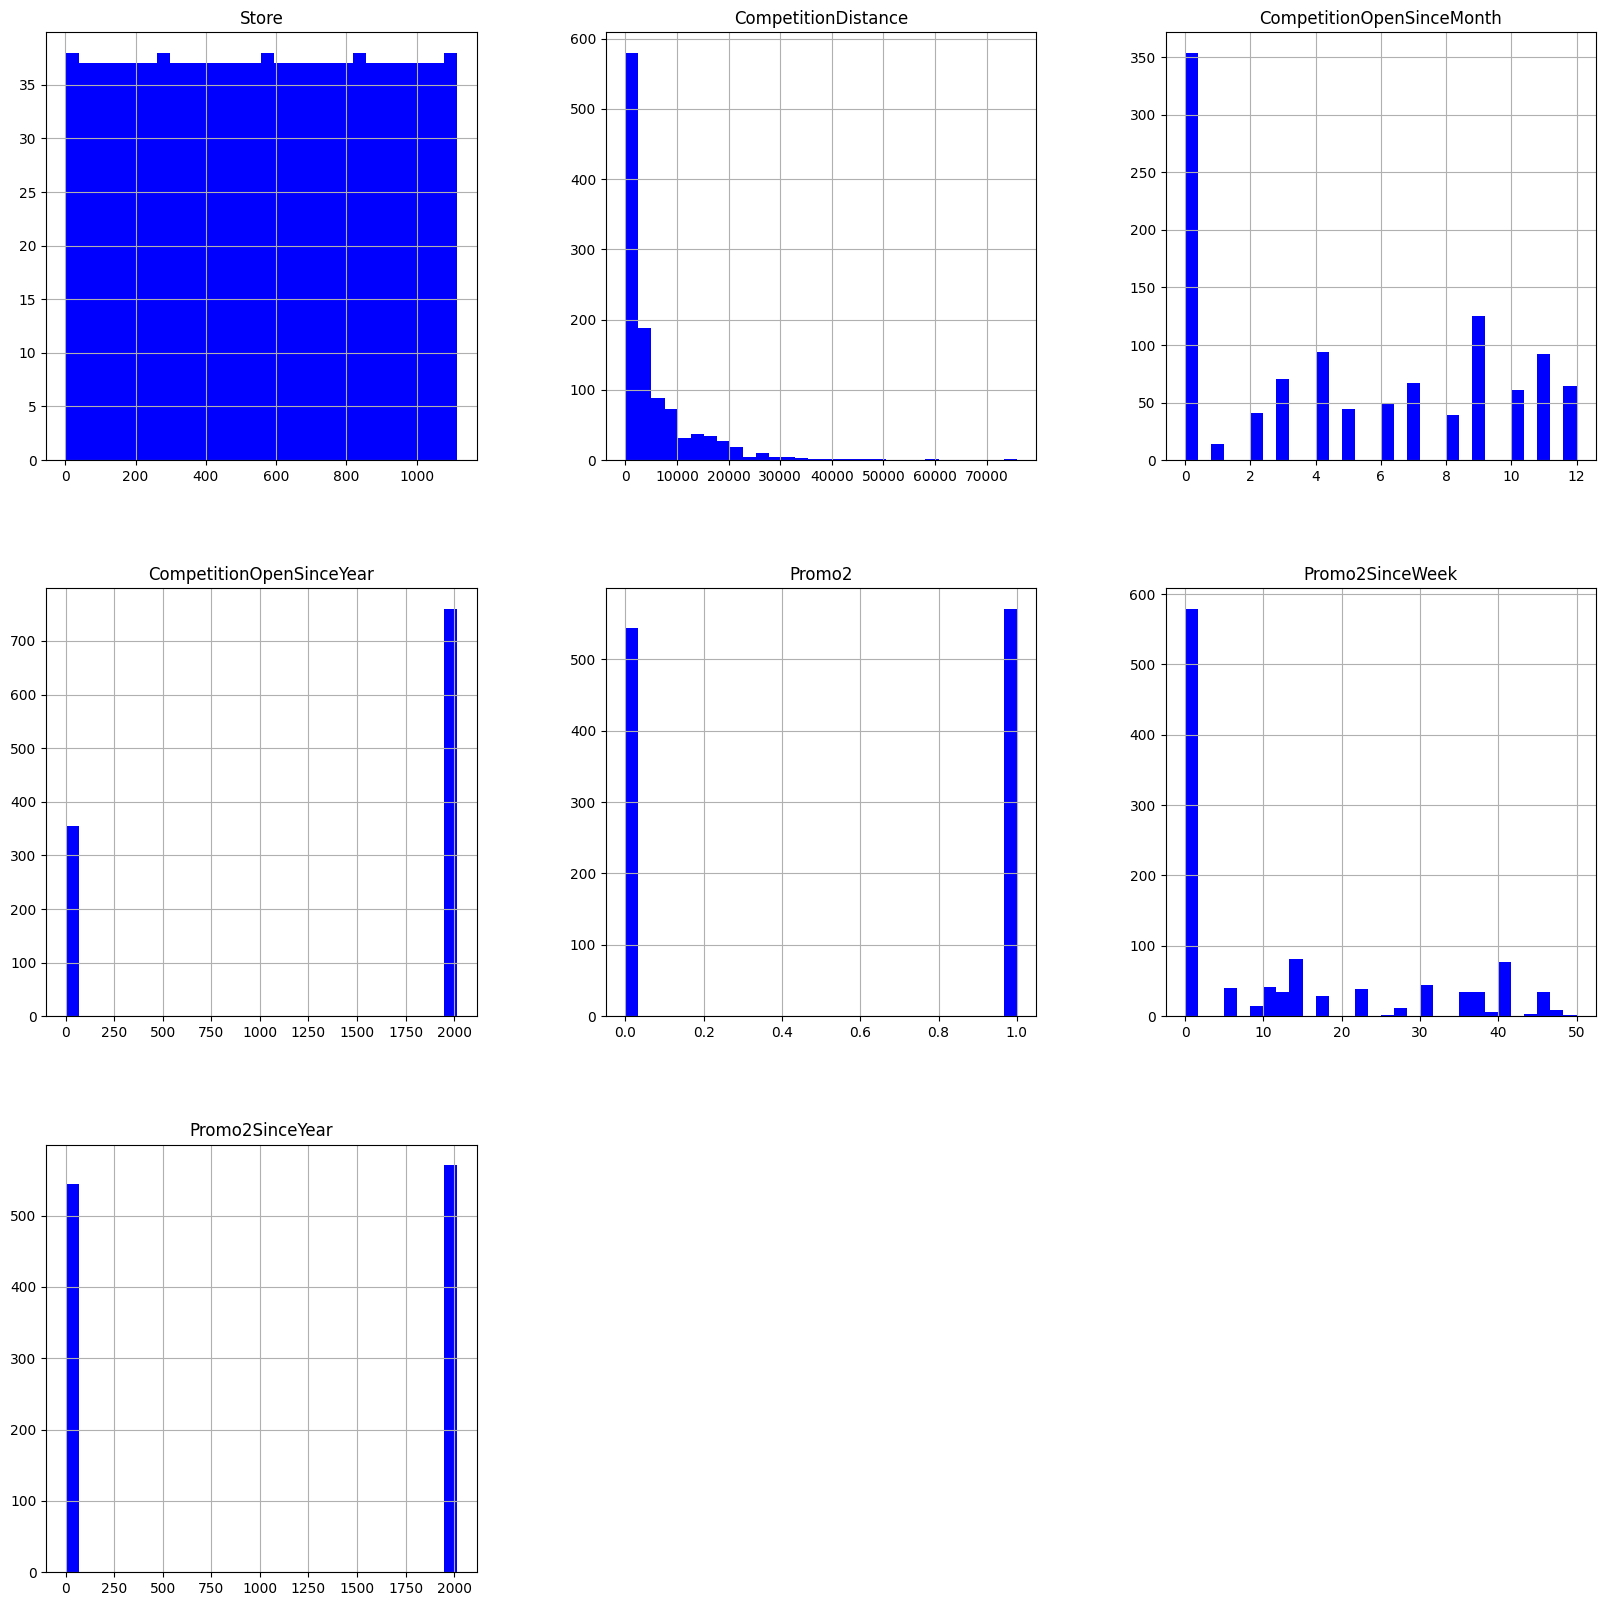

In [ ]:
store_info_df.hist(bins = 30, figsize =(20,20), color = 'b')
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

In [ ]:
#merge the sales and store data
sales_merged_df = pd.merge(sales_train_df, store_info_df, on = 'Store', how = 'inner')
sales_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [ ]:
sales_merged_df.isnull().sum() #make sure no missing value

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# see the correlations of each variables with sales
correlations = sales_merged_df.corr(numeric_only=True)['Sales'].sort_values()
correlations
# as we can see it make sense that the correlation between sales and customers are highly correlated
#By setting (numeric_only=True) means explicitly telling pandas to consider only numeric columns for correlation

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<ipython-input-33-0b41600d67bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_merged_df.corr()


<Axes: >

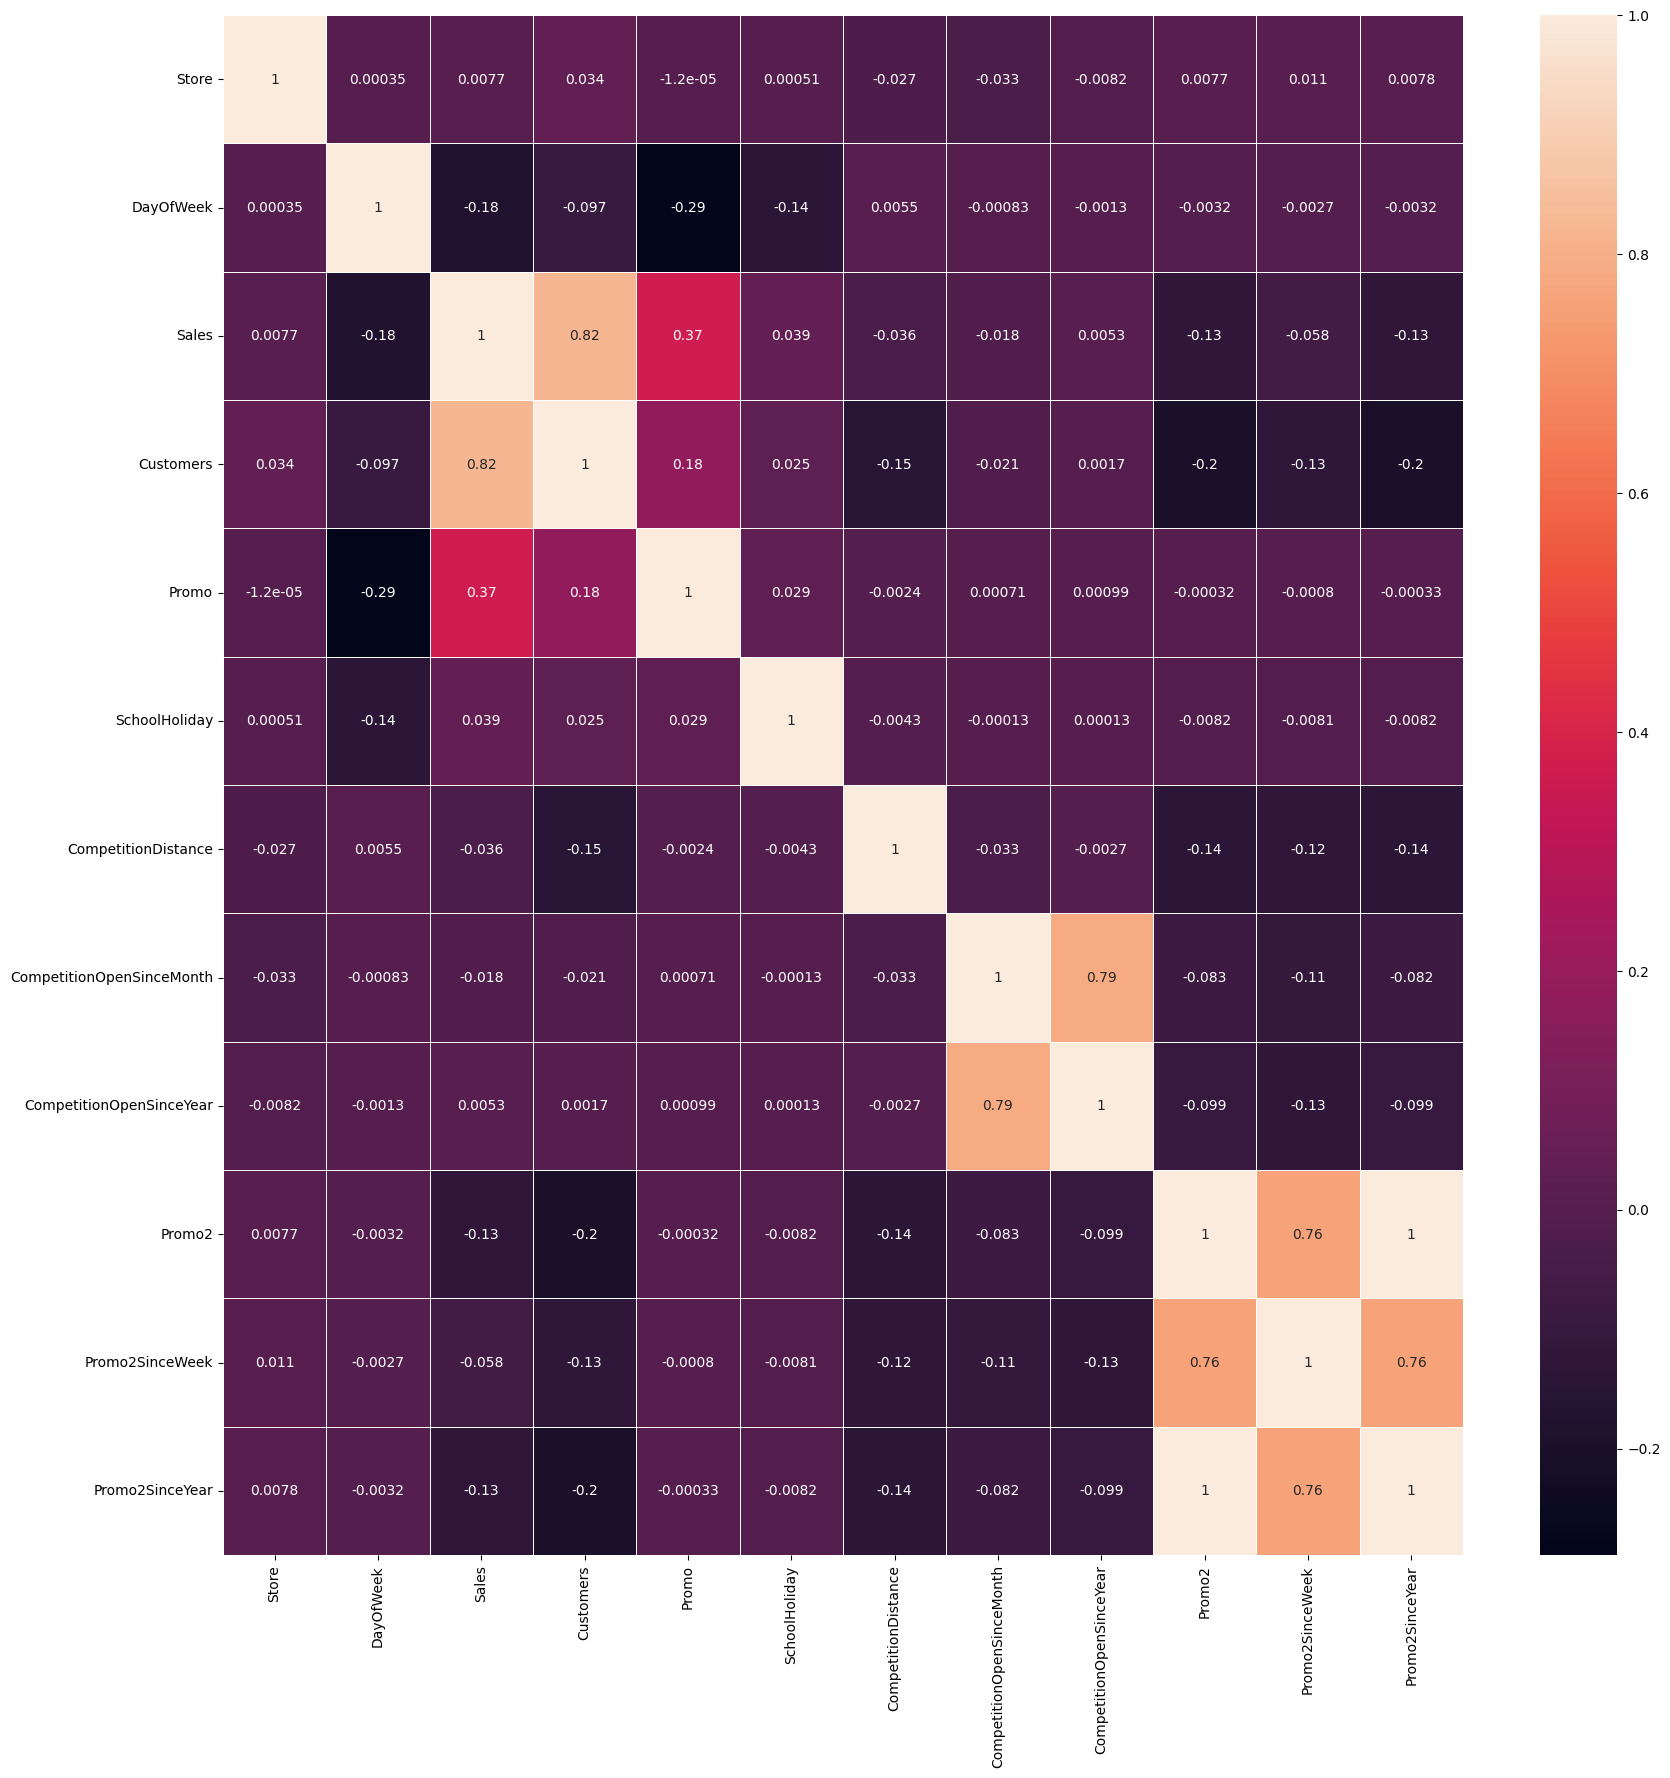

In [ ]:
correlations = sales_merged_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlations, annot = True, linewidths= .5)

In [ ]:
#separate the year into another column
sales_merged_df['Year']= pd.DatetimeIndex(sales_merged_df['Date']).year
sales_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


In [ ]:
#extract the day and month
#access the 'Date' column by using  pd.DatetimeIndex function to extract the monthe and day
sales_merged_df['Month'] = pd.DatetimeIndex(sales_merged_df['Date']).month
sales_merged_df['Day'] = pd.DatetimeIndex(sales_merged_df['Date']).day
sales_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Average Sales Per Month')

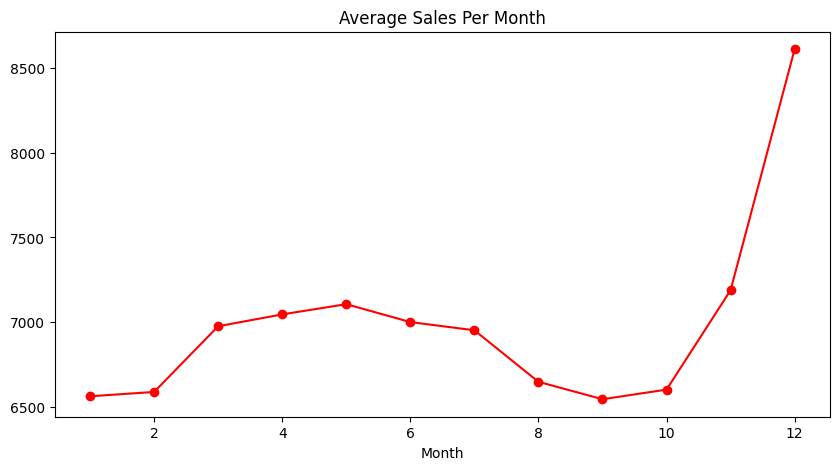

In [ ]:
# Calculate the average sales per month
# Create the plot with a size of 10x5 inches, a circle marker, and red color
average_sales_per_month = sales_merged_df.groupby('Month')['Sales'].mean()
plot = average_sales_per_month.plot(figsize = (10,5), marker = 'o', color = 'r')
plot.set_title('Average Sales Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

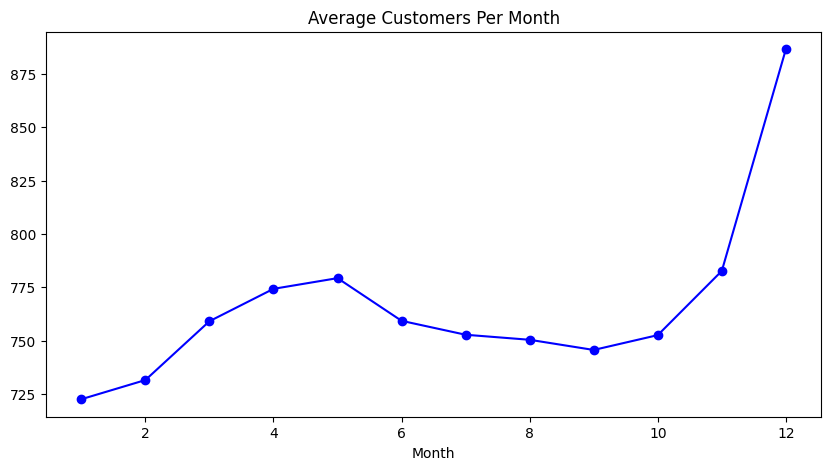

In [ ]:
# Calculate the average customers per month
average_customers_per_month = sales_merged_df.groupby('Month')['Customers'].mean()
plot = average_customers_per_month.plot(figsize = (10,5), marker = 'o', color = 'b')
plot.set_title("Average Customers Per Month")

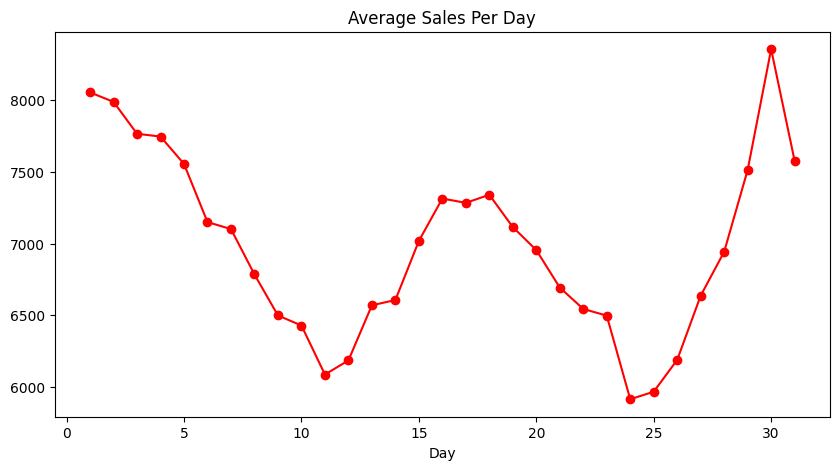

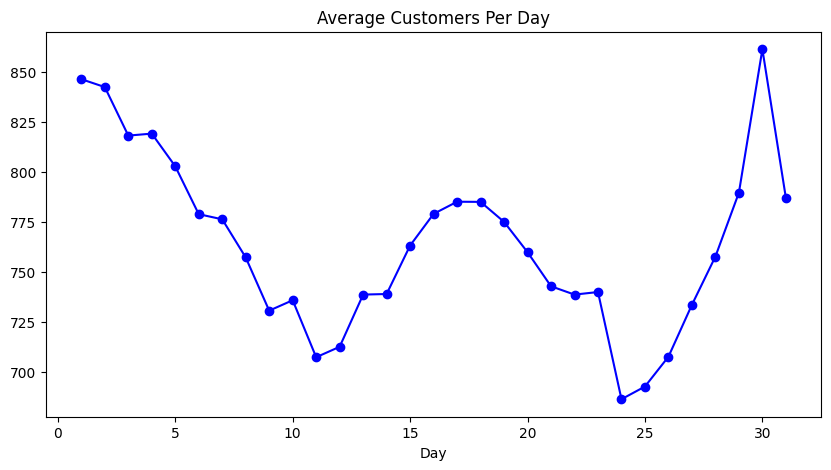

In [ ]:
# Calculate the average sales and customers per day
average_sales_per_day = sales_merged_df.groupby('Day')['Sales'].mean()
plot = average_sales_per_day.plot(figsize = (10,5), marker = 'o', color = 'r')
plot.set_title('Average Sales Per Day')
plt.show()

average_customers_per_day = sales_merged_df.groupby('Day')['Customers'].mean()
plot = average_customers_per_day.plot(figsize = (10,5), marker = 'o', color = 'b')
plot.set_title("Average Customers Per Day")
plt.show()

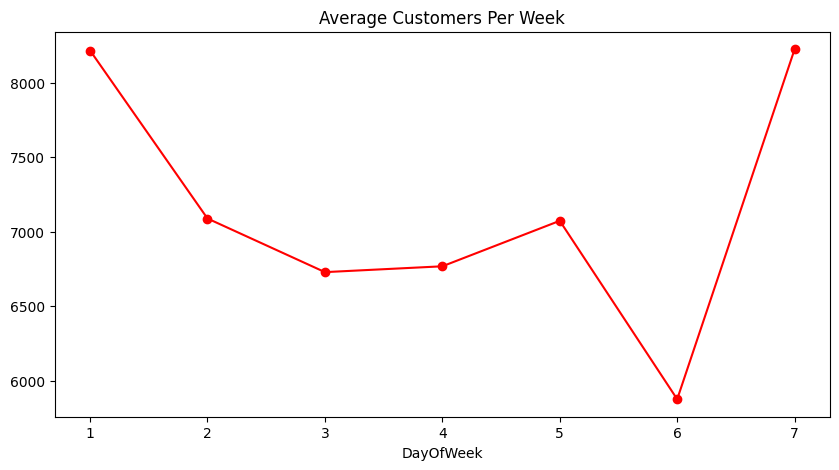

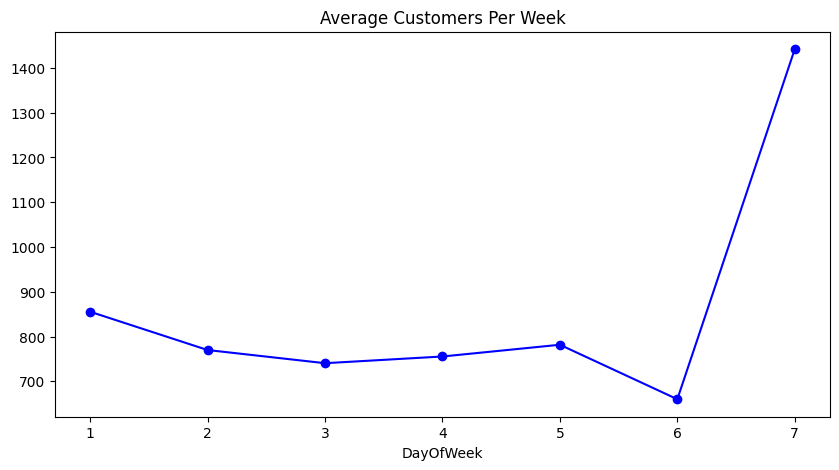

In [ ]:
# Calculate the average sales and customers in the day of week
average_sales_per_week = sales_merged_df.groupby('DayOfWeek')['Sales'].mean()
plot = average_sales_per_week.plot(figsize = (10,5), marker = 'o', color = 'r')
plot.set_title("Average Customers Per Week")
plt.show()

average_customers_per_week = sales_merged_df.groupby('DayOfWeek')['Customers'].mean()
plot = average_customers_per_week.plot(figsize = (10,5), marker = 'o', color = 'b')
plot.set_title("Average Customers Per Week")
plt.show()

<ipython-input-40-2c5b8ea1776b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sales = sales_merged_df.groupby(['Date','StoreType']).mean()['Sales'].unstack()


Text(0, 0.5, 'Average Sales')

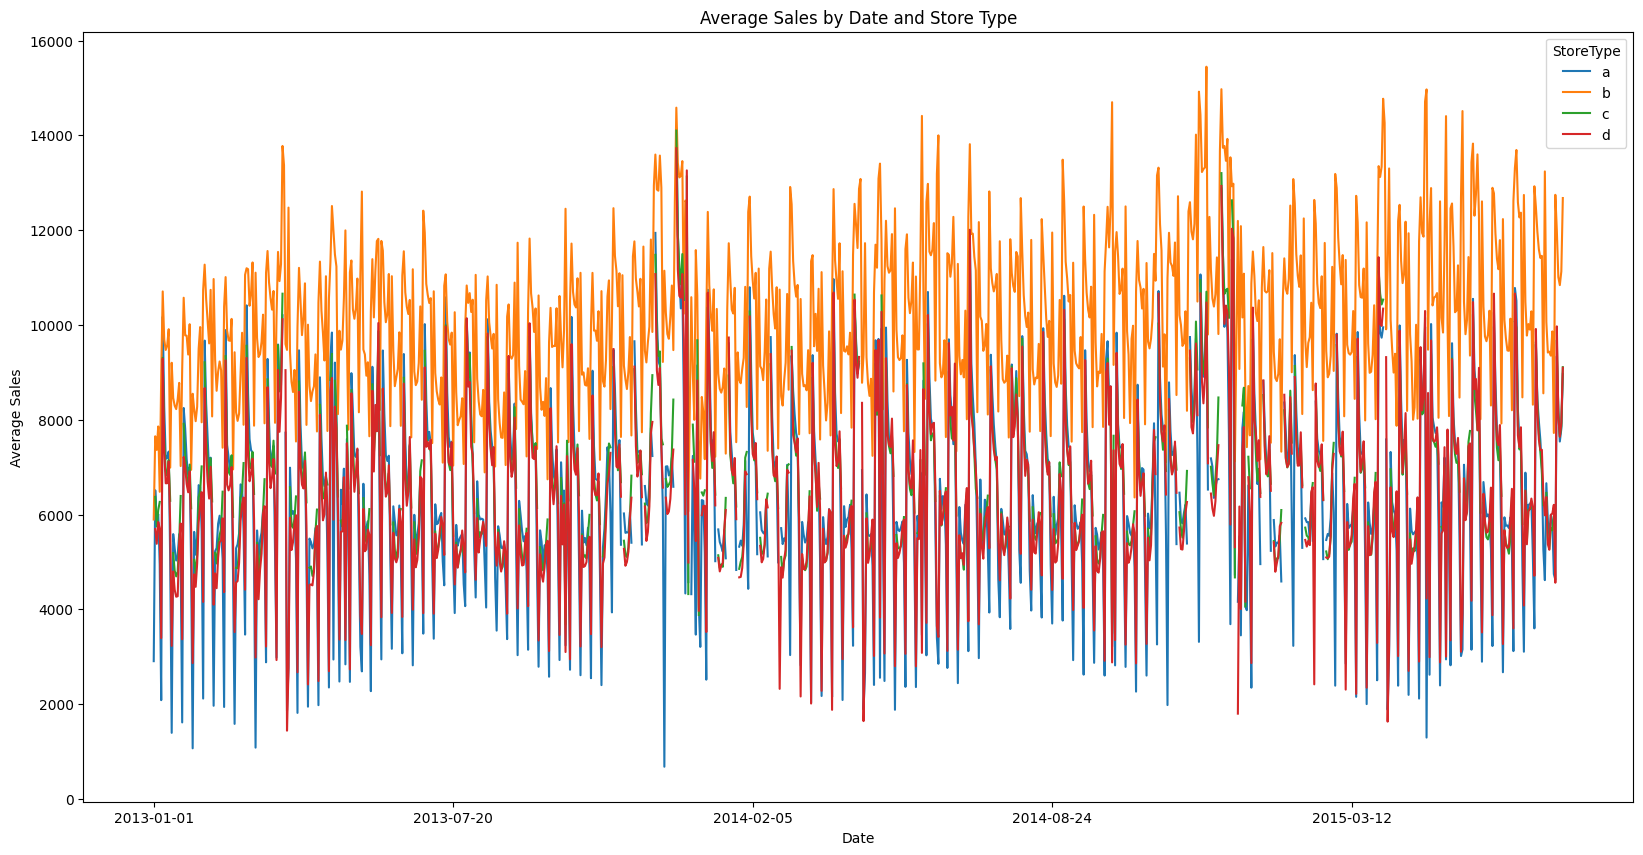

In [ ]:
# Group the data by 'Date' and 'StoreType', calculate the mean of 'Sales'
# Then, unstack the 'StoreType' level so we have separate columns for each store type
fig, ax = plt.subplots(figsize=(20,10))
average_sales = sales_merged_df.groupby(['Date','StoreType']).mean()['Sales'].unstack()
average_sales.plot(ax=ax)

ax.set_title('Average Sales by Date and Store Type')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sales')

In [ ]:
pip install prophet

In [ ]:
df_prophet = sales_merged_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(daily_seasonality=True)

In [ ]:
# Fit the model with your DataFrame
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpntz6fj3v/6pw30idc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpntz6fj3v/e4wfvxrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8656', 'data', 'file=/tmp/tmpntz6fj3v/6pw30idc.json', 'init=/tmp/tmpntz6fj3v/e4wfvxrt.json', 'output', 'file=/tmp/tmpntz6fj3v/prophet_model1x5vd6ay/prophet_model-20240218212131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates to predict
future_dates = model.make_future_dataframe(periods=60)

# Make predictions
forecast = model.predict(future_dates)

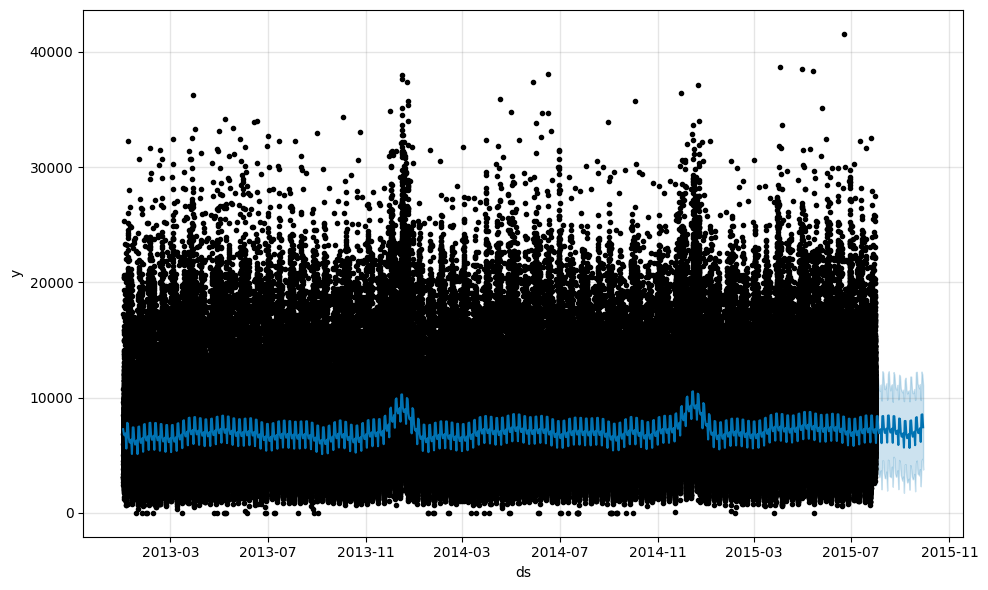

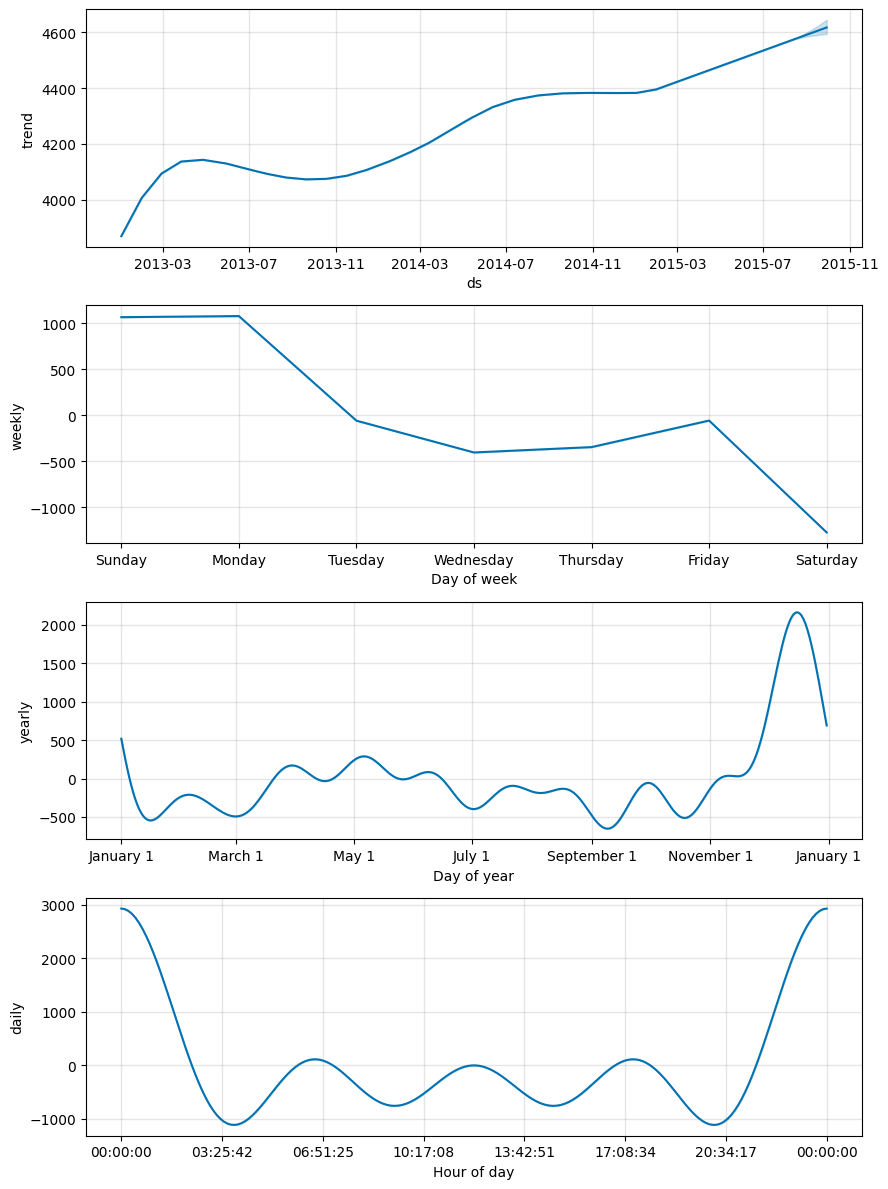

In [ ]:
# Plot the forecast
fig1 = model.plot(forecast)

# Plot the forecast components
fig2 = model.plot_components(forecast)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3870.483960,3445.828120,11152.310280,3870.483960,3870.483960,3385.778388,3385.778388,3385.778388,2925.938318,...,-59.197656,-59.197656,-59.197656,519.037726,519.037726,519.037726,0.0,0.0,0.0,7256.262349
1,2013-01-02,3875.200771,3131.928609,10543.373246,3875.200771,3875.200771,2907.335587,2907.335587,2907.335587,2925.938318,...,-404.295689,-404.295689,-404.295689,385.692958,385.692958,385.692958,0.0,0.0,0.0,6782.536359
2,2013-01-03,3879.917583,2975.093226,10398.550765,3879.917583,3879.917583,2838.201228,2838.201228,2838.201228,2925.938318,...,-346.089082,-346.089082,-346.089082,258.351992,258.351992,258.351992,0.0,0.0,0.0,6718.118811
3,2013-01-04,3884.634394,3327.978184,10680.858301,3884.634394,3884.634394,3006.077272,3006.077272,3006.077272,2925.938318,...,-58.101327,-58.101327,-58.101327,138.240281,138.240281,138.240281,0.0,0.0,0.0,6890.711665
4,2013-01-05,3889.351205,1692.134861,9466.615638,3889.351205,3889.351205,1680.551919,1680.551919,1680.551919,2925.938318,...,-1271.796075,-1271.796075,-1271.796075,26.409677,26.409677,26.409677,0.0,0.0,0.0,5569.903124


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,7256.262349,3445.828120,11152.310280
1,2013-01-02,6782.536359,3131.928609,10543.373246
2,2013-01-03,6718.118811,2975.093226,10398.550765
3,2013-01-04,6890.711665,3327.978184,10680.858301
4,2013-01-05,5569.903124,1692.134861,9466.615638
5,2013-01-06,7807.448666,4193.699620,11505.539642
6,2013-01-07,7731.351847,4064.231987,11717.524077
7,2013-01-08,6518.543303,2565.403271,10410.045831
8,2013-01-09,6106.179203,2204.525709,10122.726448
9,2013-01-10,6107.792653,2537.075532,9696.560733


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3870.483960,3445.828120,11152.310280,3870.483960,3870.483960,3385.778388,3385.778388,3385.778388,2925.938318,...,-59.197656,-59.197656,-59.197656,519.037726,519.037726,519.037726,0.0,0.0,0.0,7256.262349
1,2013-01-02,3875.200771,3131.928609,10543.373246,3875.200771,3875.200771,2907.335587,2907.335587,2907.335587,2925.938318,...,-404.295689,-404.295689,-404.295689,385.692958,385.692958,385.692958,0.0,0.0,0.0,6782.536359
2,2013-01-03,3879.917583,2975.093226,10398.550765,3879.917583,3879.917583,2838.201228,2838.201228,2838.201228,2925.938318,...,-346.089082,-346.089082,-346.089082,258.351992,258.351992,258.351992,0.0,0.0,0.0,6718.118811
3,2013-01-04,3884.634394,3327.978184,10680.858301,3884.634394,3884.634394,3006.077272,3006.077272,3006.077272,2925.938318,...,-58.101327,-58.101327,-58.101327,138.240281,138.240281,138.240281,0.0,0.0,0.0,6890.711665
4,2013-01-05,3889.351205,1692.134861,9466.615638,3889.351205,3889.351205,1680.551919,1680.551919,1680.551919,2925.938318,...,-1271.796075,-1271.796075,-1271.796075,26.409677,26.409677,26.409677,0.0,0.0,0.0,5569.903124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2015-09-25,4612.636905,3789.527789,11171.602666,4592.040195,4637.131618,2717.993987,2717.993987,2717.993987,2925.938318,...,-58.101327,-58.101327,-58.101327,-149.843003,-149.843003,-149.843003,0.0,0.0,0.0,7330.630893
998,2015-09-26,4613.551765,2295.721757,9781.384702,4592.420379,4638.771880,1534.647697,1534.647697,1534.647697,2925.938318,...,-1271.796075,-1271.796075,-1271.796075,-119.494545,-119.494545,-119.494545,0.0,0.0,0.0,6148.199463
999,2015-09-27,4614.466625,4534.400047,12253.861814,4592.951516,4640.587286,3895.173977,3895.173977,3895.173977,2925.938318,...,1063.715720,1063.715720,1063.715720,-94.480060,-94.480060,-94.480060,0.0,0.0,0.0,8509.640603
1000,2015-09-28,4615.381485,4683.284518,11995.167663,4593.482653,4642.294140,3926.346747,3926.346747,3926.346747,2925.938318,...,1075.764110,1075.764110,1075.764110,-75.355681,-75.355681,-75.355681,0.0,0.0,0.0,8541.728233
